In [2]:
# make some useful plots
%matplotlib notebook
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import pandas as pd
import pickle
from donutlib.decamutil import decaminfo

In [3]:
dfold = pd.read_pickle("/nfs/slac/g/ki/ki06/roodman/Donuts/20140212s2/284602/v21/DECam_284602.second.pkl")
dfnew = pd.read_pickle("/nfs/slac/g/ki/ki06/roodman/Donuts/20140212s2/284602/v22/DECam_284602.second.pkl")

In [4]:
print(dfold.columns)
print(dfold.shape,dfnew.shape)

Index(['EXTEND', 'IFILE', 'FILTER', 'OBSID', 'OBSTYPE', 'ZD', 'HA', 'EXPTIME',
       'RA', 'DEC', 'MSURTEMP', 'MAIRTEMP', 'MJD-OBS', 'EXTNAME', 'IX', 'IY',
       'X_IMAGE', 'Y_IMAGE', 'ISTAMP', 'XDECAM', 'YDECAM', 'SEX_FLUX',
       'SEX_FLGS', 'SEX_ELPT', 'SEX_AVEI', 'CHI2', 'DOF', 'FITSTAT', 'CLKTIME',
       'NCALCALL', 'NCALCDER', 'NELE', 'RZERO', 'BKGD', 'ZERN2', 'ZERN3',
       'ZERN4', 'ZERN5', 'ZERN6', 'ZERN7', 'ZERN8', 'ZERN9', 'ZERN10',
       'ZERN11', 'ZERN12', 'ZERN13', 'ZERN14', 'ZERN15', 'NELEE', 'RZEROE',
       'BKGDE', 'ZERN2E', 'ZERN3E', 'ZERN4E', 'ZERN5E', 'ZERN6E', 'ZERN7E',
       'ZERN8E', 'ZERN9E', 'ZERN10E', 'ZERN11E', 'ZERN12E', 'ZERN13E',
       'ZERN14E', 'ZERN15E'],
      dtype='object')
(7683, 65) (7683, 109)


<IPython.core.display.Javascript object>


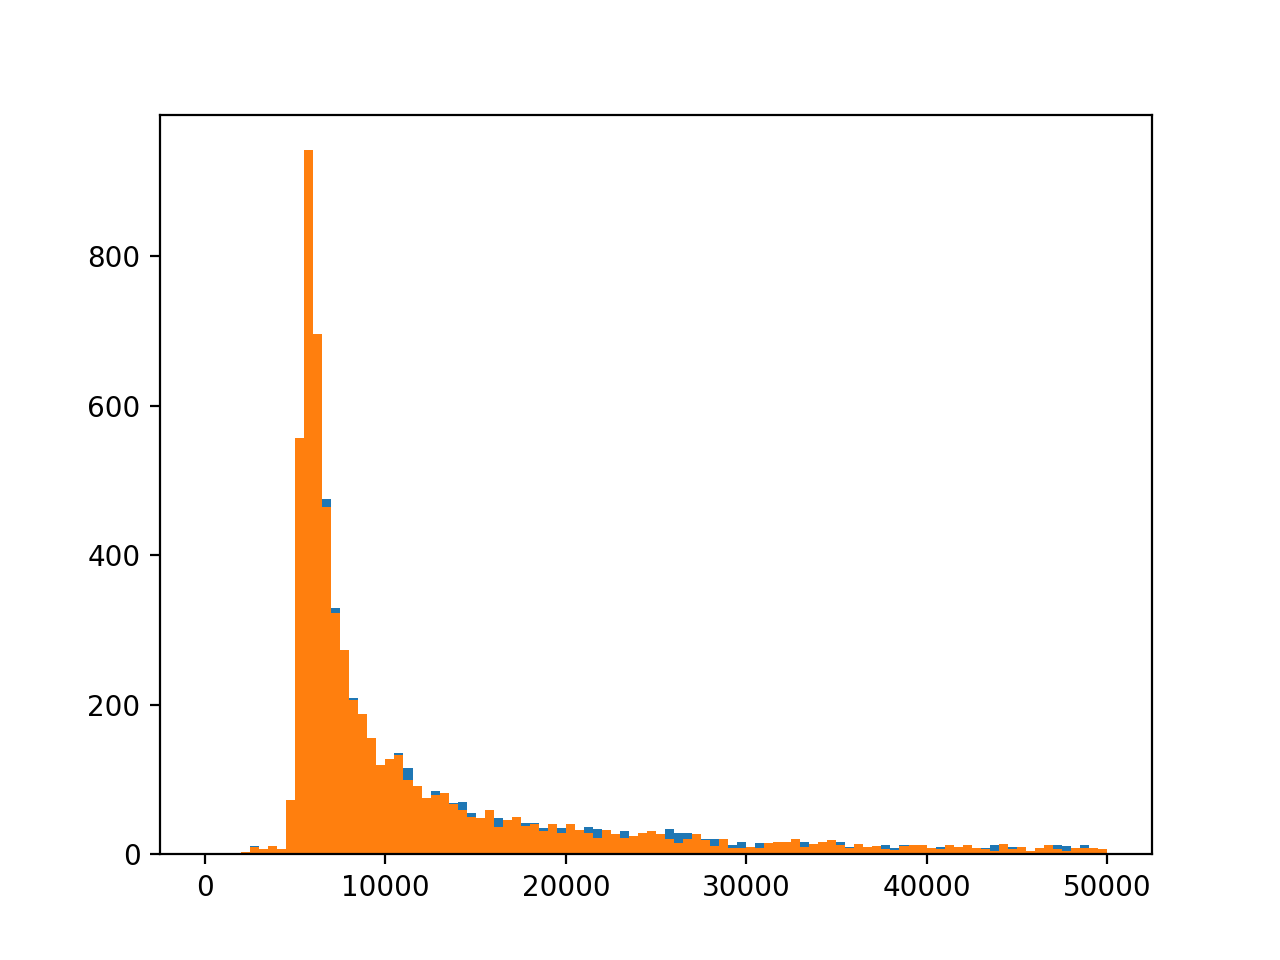

In [5]:
f = plt.figure()
h1 = plt.hist(dfold['CHI2'],bins=100,range=(0,5e4))
h2 = plt.hist(dfnew['CHI2'],bins=100,range=(0,5e4))

<IPython.core.display.Javascript object>


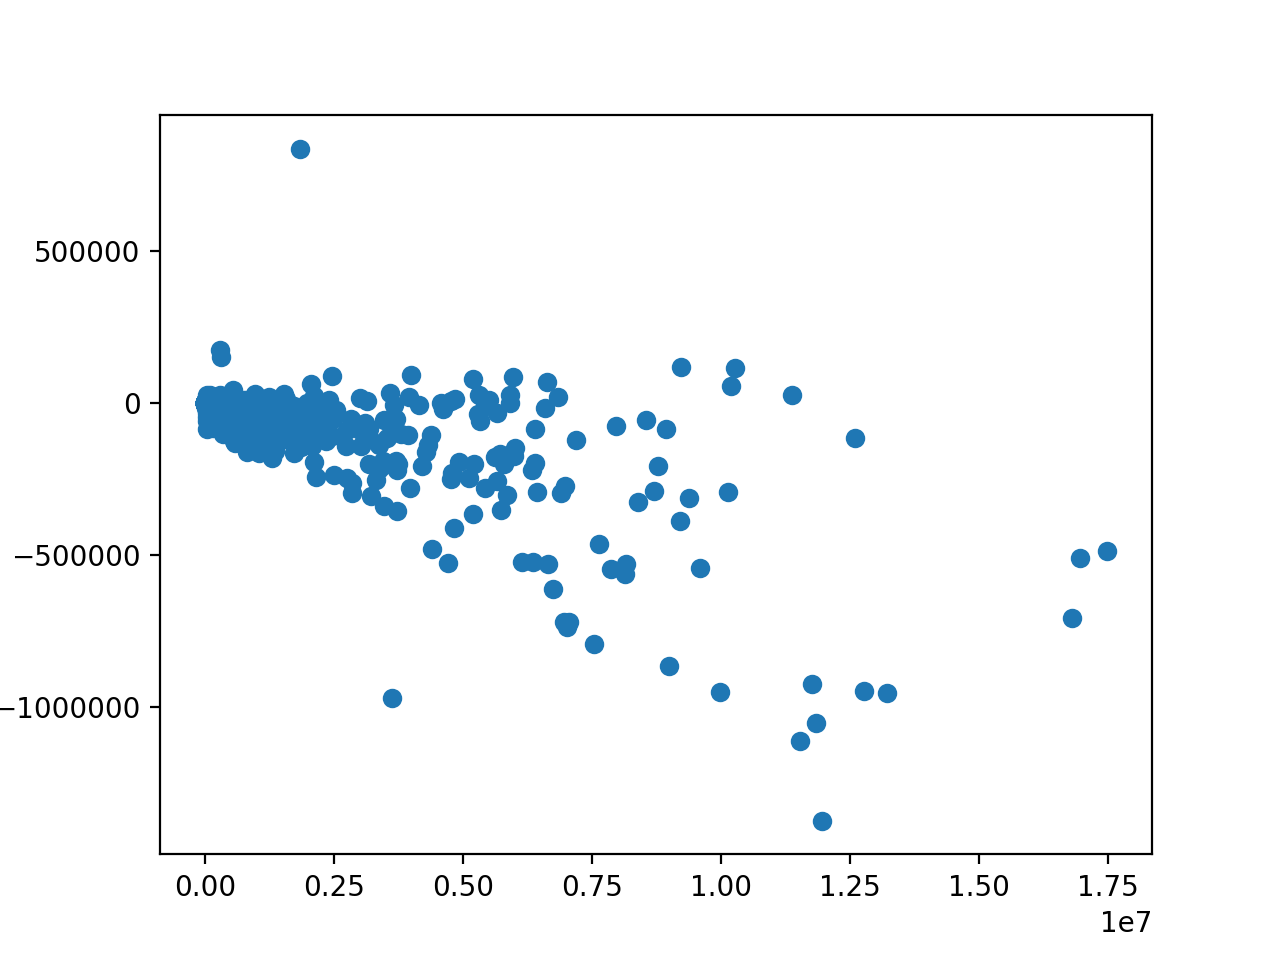

In [6]:
f = plt.figure()
plt.scatter(dfnew['CHI2'],dfnew['CHI2']-dfold['CHI2'])

<IPython.core.display.Javascript object>


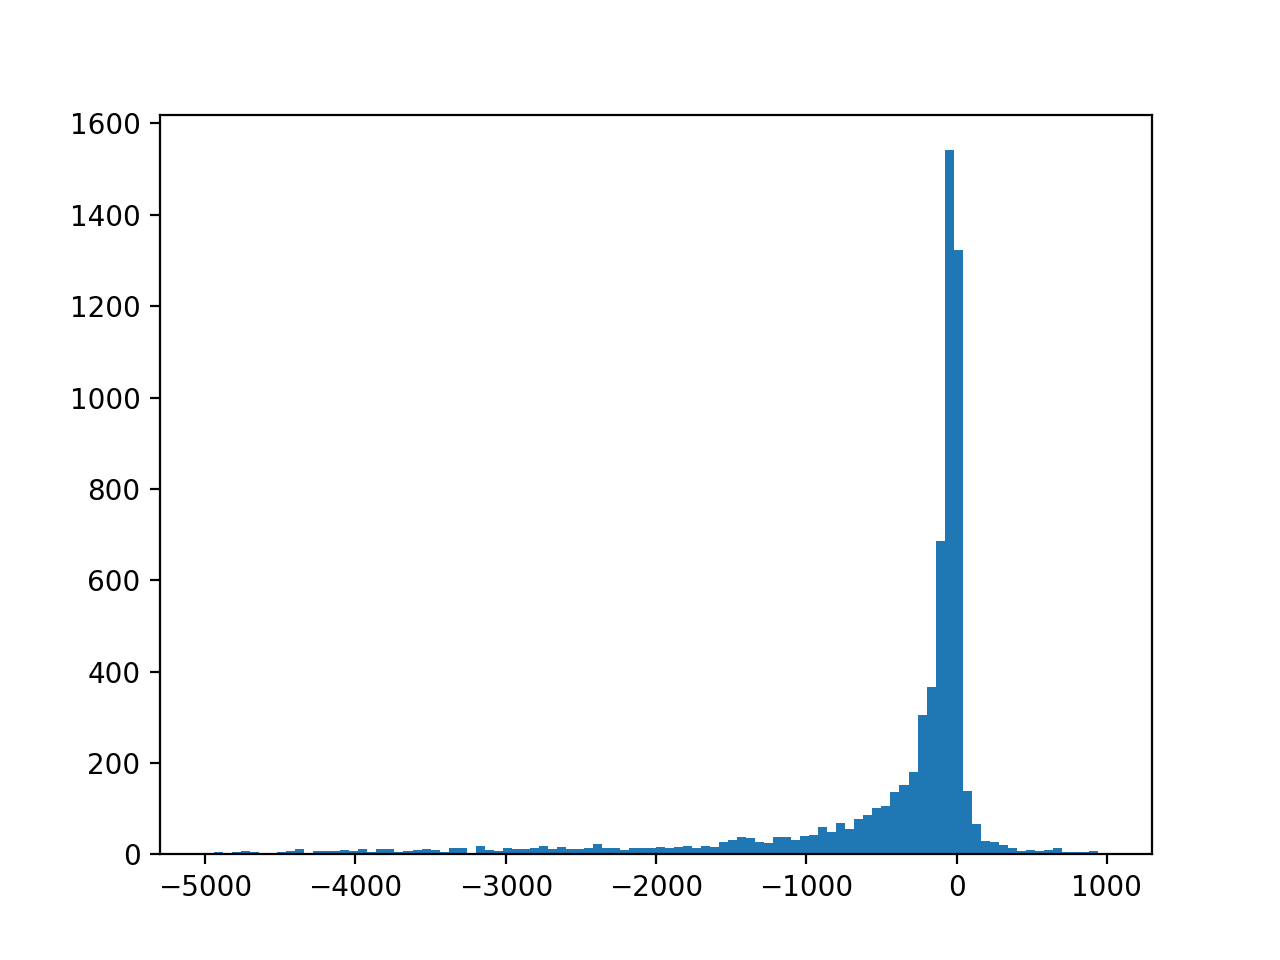

In [7]:
f = plt.figure()
h = plt.hist(dfnew['CHI2']-dfold['CHI2'],bins=100,range=(-5e3,1e3))

<IPython.core.display.Javascript object>


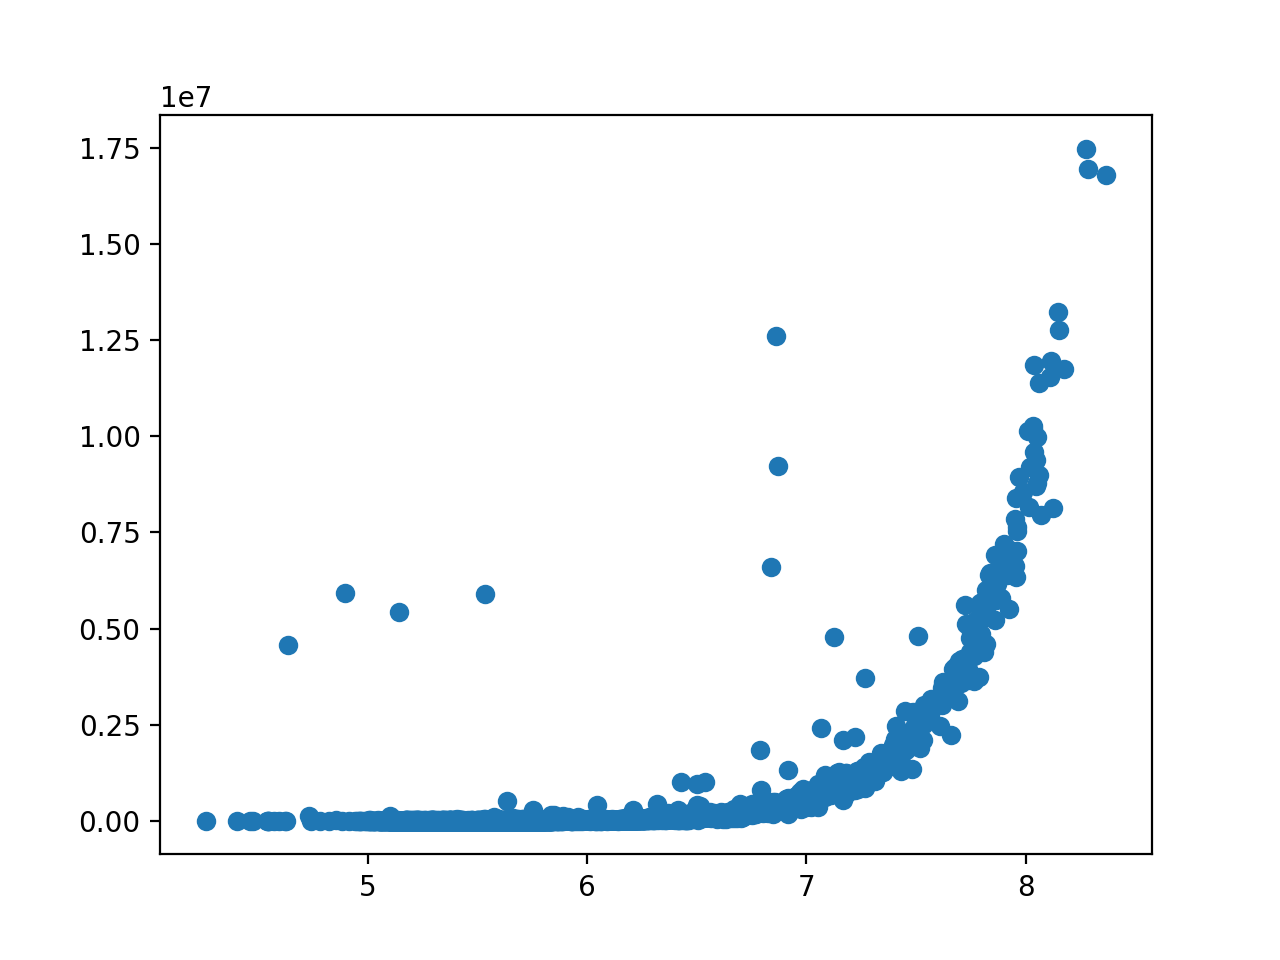

/nfs/slac/g/ki/ki06/roodman/Software/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in log10
  


In [8]:
f = plt.figure()
plt.scatter(np.log10(dfnew['NELE']),dfnew['CHI2'])

<IPython.core.display.Javascript object>


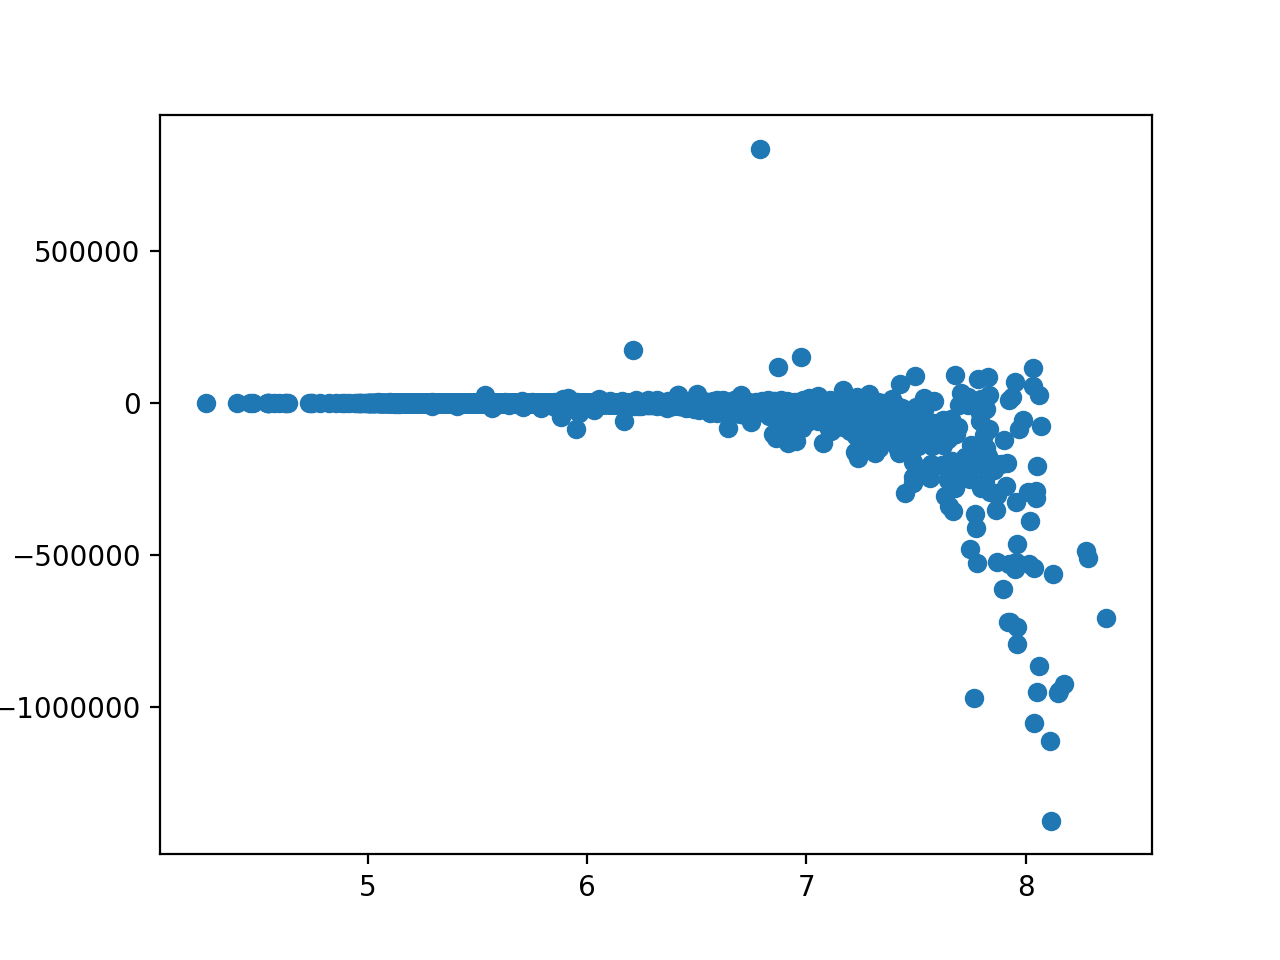

/nfs/slac/g/ki/ki06/roodman/Software/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in log10
  


In [9]:
f = plt.figure()
plt.scatter(np.log10(dfnew['NELE']),dfnew['CHI2']-dfold['CHI2'])

In [10]:
# just look at log(nele) between 6 and 7
ok = (np.log10(dfnew['NELE']) > 6.) & (np.log10(dfnew['NELE']) > 6.) 
dfnew_ok = dfnew[ok]
dfold_ok = dfold[ok]

/nfs/slac/g/ki/ki06/roodman/Software/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in log10
  


<IPython.core.display.Javascript object>


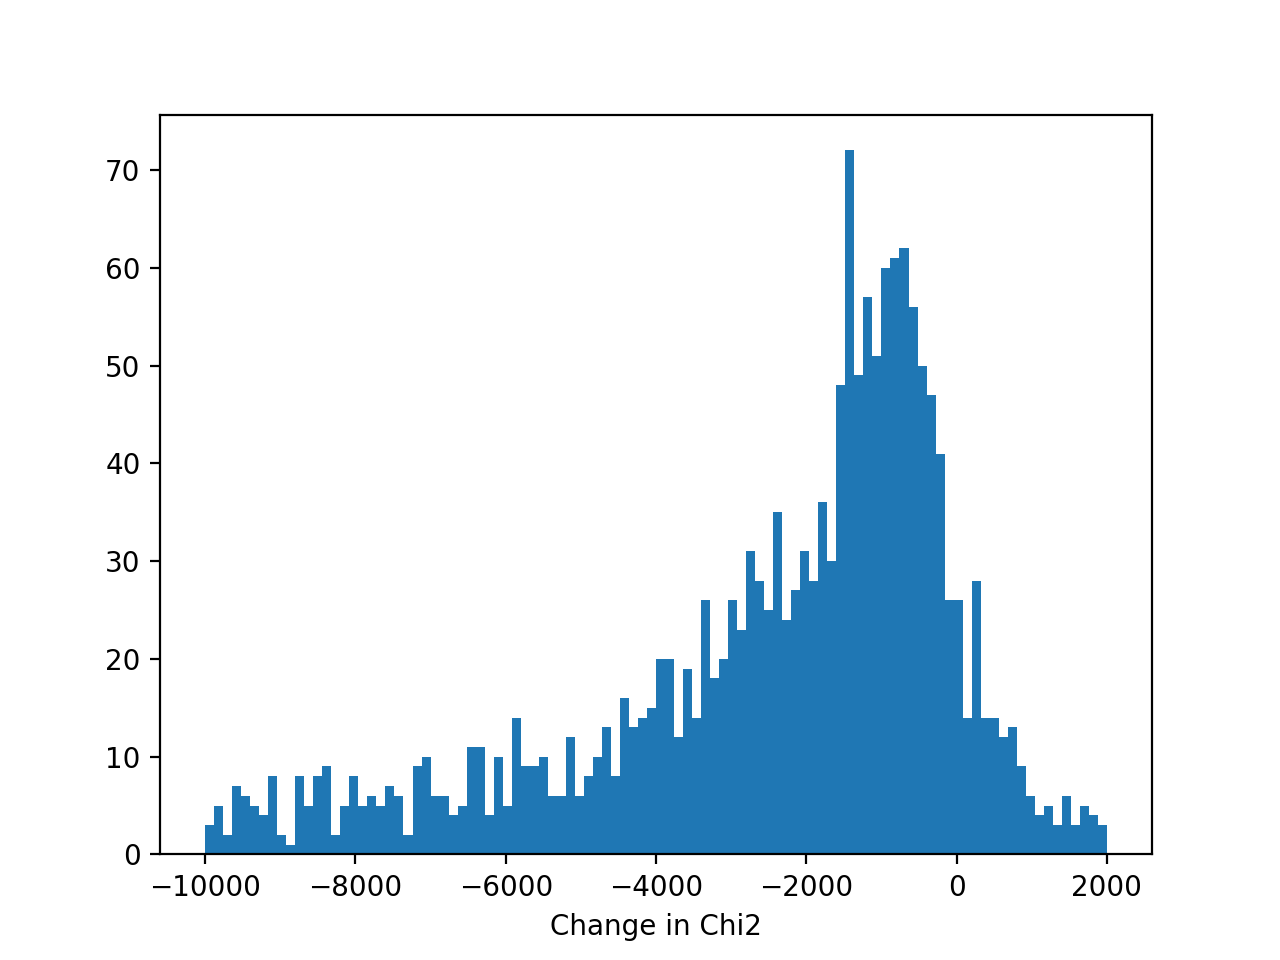

Text(0.5,0,'Change in Chi2')

In [11]:
f,ax = plt.subplots(1,1)
h = ax.hist(dfnew_ok['CHI2']-dfold_ok['CHI2'],bins=100,range=(-1e4,2e3))
ax.set_xlabel("Change in Chi2")

<IPython.core.display.Javascript object>


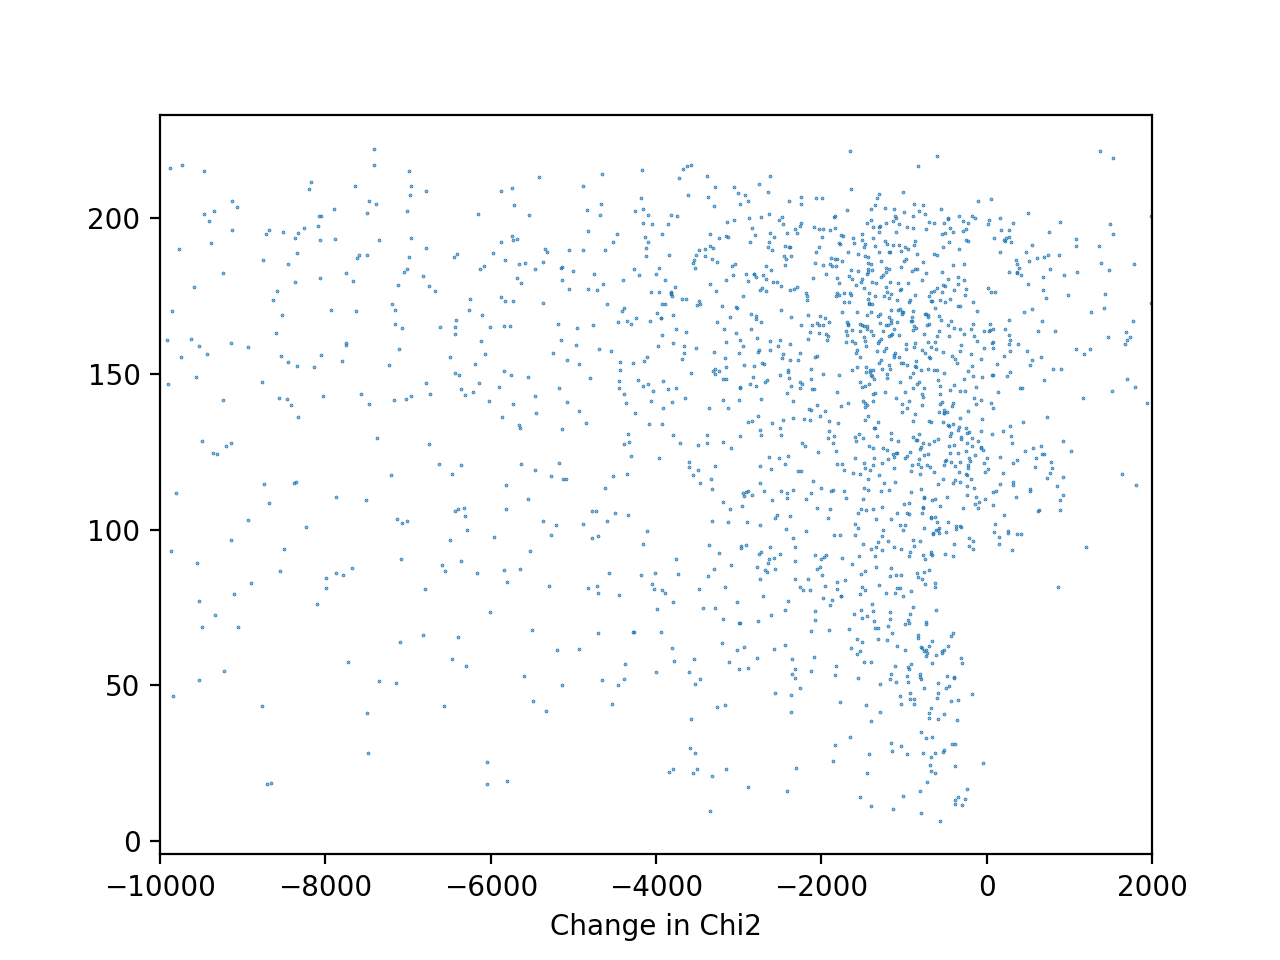

(-10000.0, 2000.0)

In [12]:
f,ax = plt.subplots(1,1)
h = ax.scatter(dfnew_ok['CHI2']-dfold_ok['CHI2'],np.sqrt(np.power(dfnew_ok['XDECAM'],2)+np.power(dfnew_ok['YDECAM'],2)),s=0.1)
ax.set_xlabel("Change in Chi2")
ax.set_xlim(-1e4,2e3)

<IPython.core.display.Javascript object>


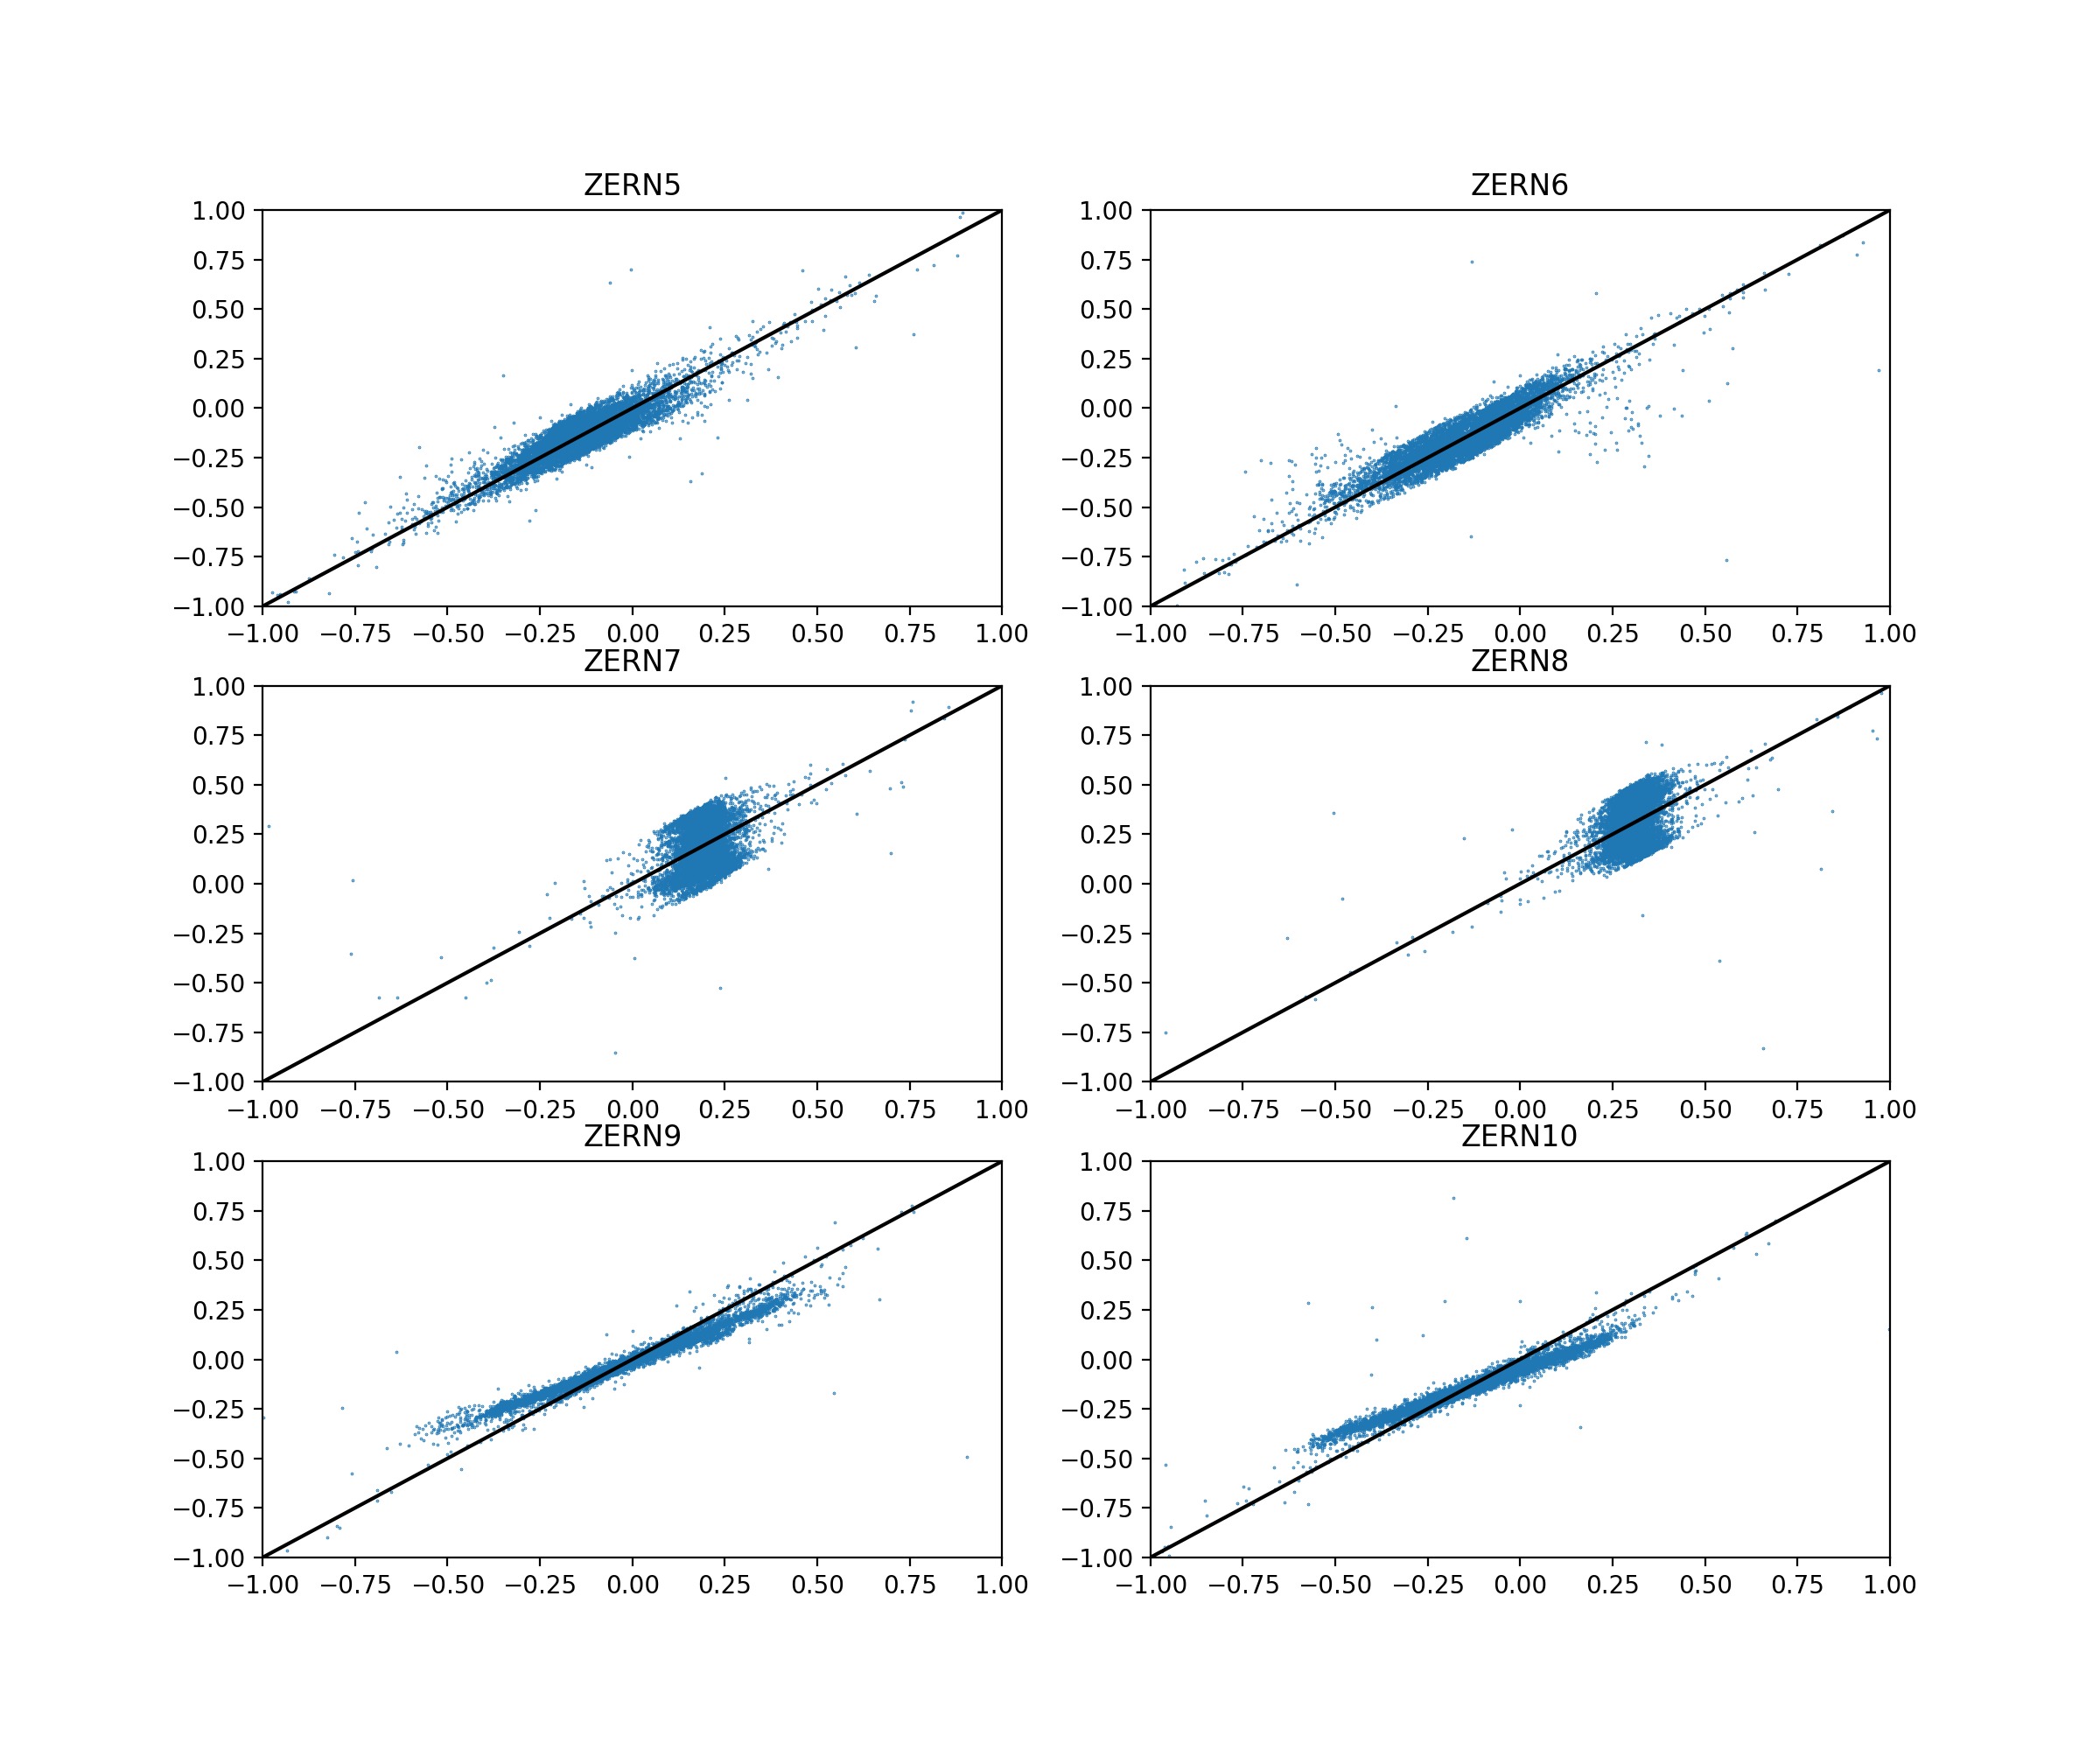

In [28]:
f,ax = plt.subplots(3,2,figsize=(12,10))
axf = ax.flatten()
for i,iZ in enumerate(range(5,10+1)):
    varname = 'ZERN%d' % (iZ) 
    axf[i].scatter(dfold[varname],dfnew[varname],s=0.1)
    axf[i].set_xlim(-1,1)
    axf[i].set_ylim(-1,1)
    axf[i].plot([-1,1],[-1,1],'k-')
    axf[i].set_title(varname)


In [14]:
def passCuts(df):

    # cuts
    neleCut = 5.
    sumsqzernCut = 1.5
    ncalcallCut = 200
    rdecamCut = 225.
    absz4LoCut = 4.
    absz4HiCut = 15.

    nelePass = np.log10(df.NELE) > neleCut
    sumsqzernPass = np.sqrt(np.power(df.ZERN5,2)+np.power(df.ZERN6,2)+np.power(df.ZERN7,2)+np.power(df.ZERN8,2)) < sumsqzernCut
    ncalcallPass = df.NCALCALL < ncalcallCut
    rdecamPass = np.sqrt(np.power(df.XDECAM,2)+np.power(df.YDECAM,2)) < rdecamCut
    z4LoPass = np.abs(df.ZERN4) > absz4LoCut
    z4HiPass = np.abs(df.ZERN4) < absz4HiCut
    allPass = nelePass & sumsqzernPass & ncalcallPass & rdecamPass & z4LoPass & z4HiPass
    
    df_pass = df[allPass]
    return df_pass

In [15]:
dfnew_pass = passCuts(dfnew)
dfold_pass = passCuts(dfold)

/nfs/slac/g/ki/ki06/roodman/Software/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:11: RuntimeWarning: divide by zero encountered in log10
  # This is added back by InteractiveShellApp.init_path()


<IPython.core.display.Javascript object>


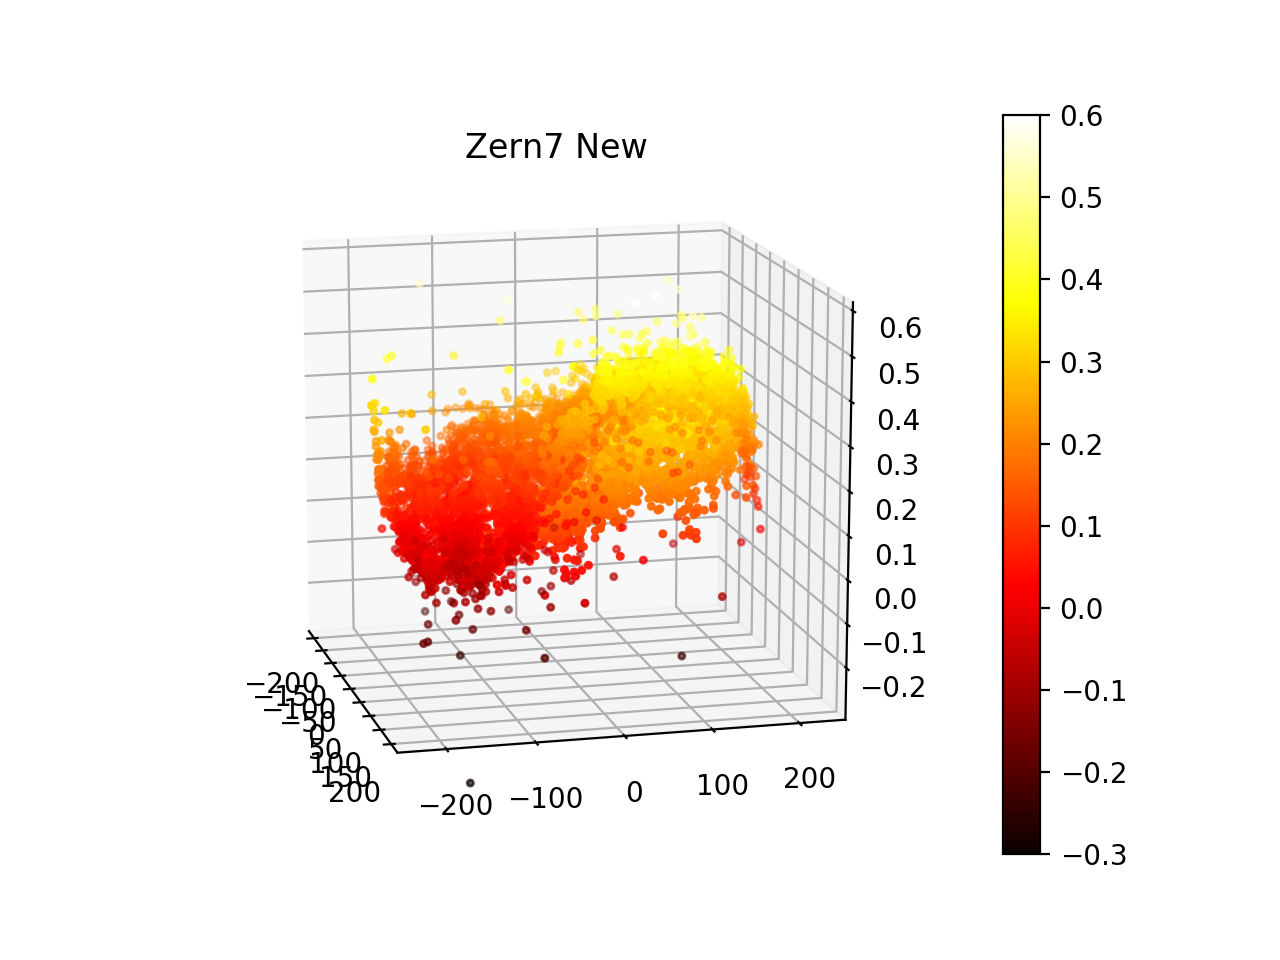

In [36]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
p = ax.scatter(dfnew_pass['XDECAM'], dfnew_pass['YDECAM'], dfnew_pass['ZERN7'], c=dfnew_pass['ZERN7'],vmin=-0.3,vmax=0.6, marker='.',cmap='hot')
ax.set_zlim3d(-0.3,0.6)
ax.set_title("Zern7 New")
fig.colorbar(p)

<IPython.core.display.Javascript object>


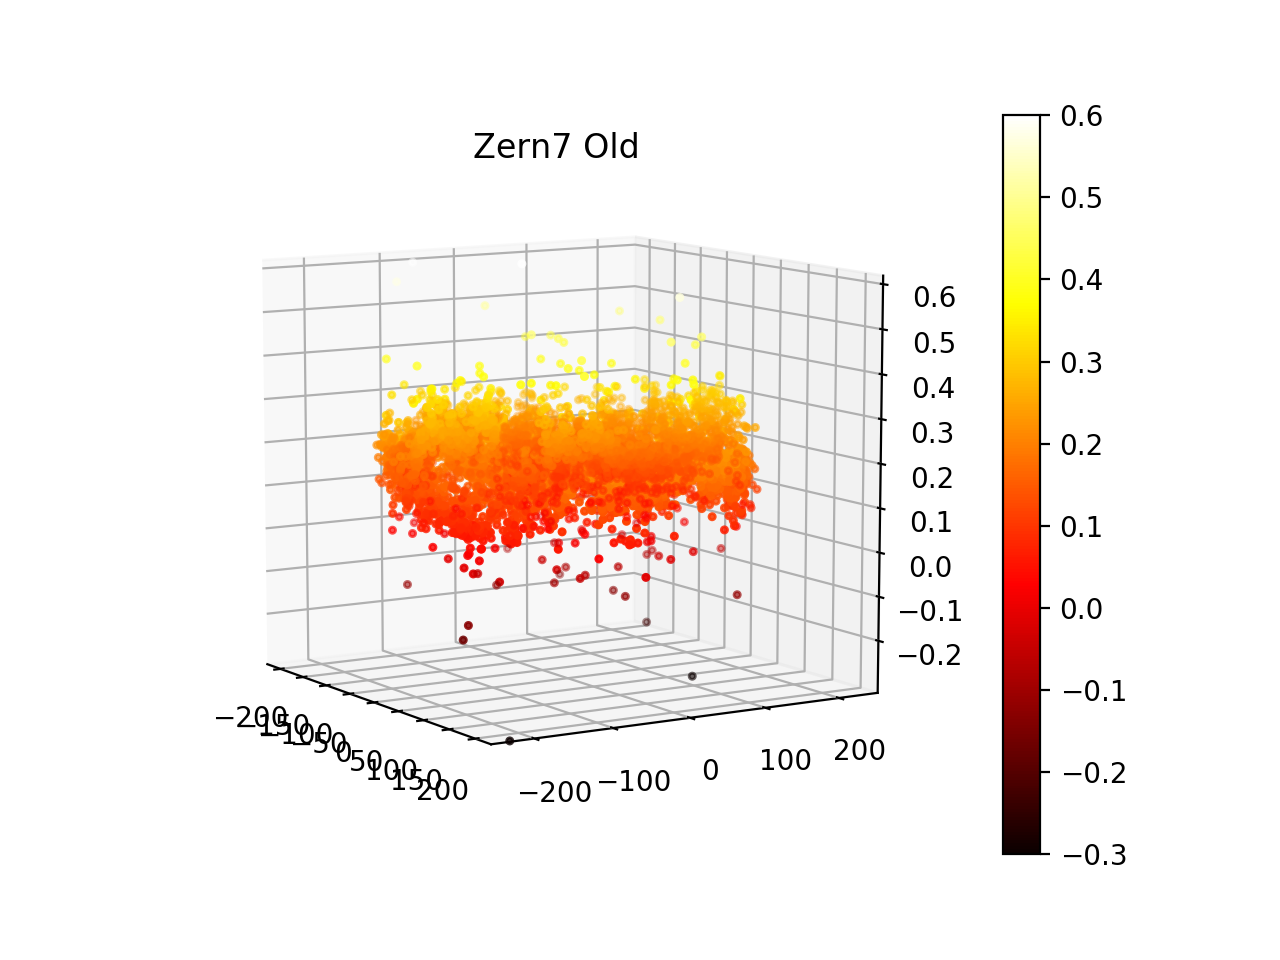

In [37]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
p = ax.scatter(dfold_pass['XDECAM'], dfold_pass['YDECAM'], dfold_pass['ZERN7'], c=dfold_pass['ZERN7'],vmin=-0.3,vmax=0.6, marker='.',cmap='hot')
ax.set_zlim(-0.3,0.6)
ax.set_title("Zern7 Old")
fig.colorbar(p)

<IPython.core.display.Javascript object>


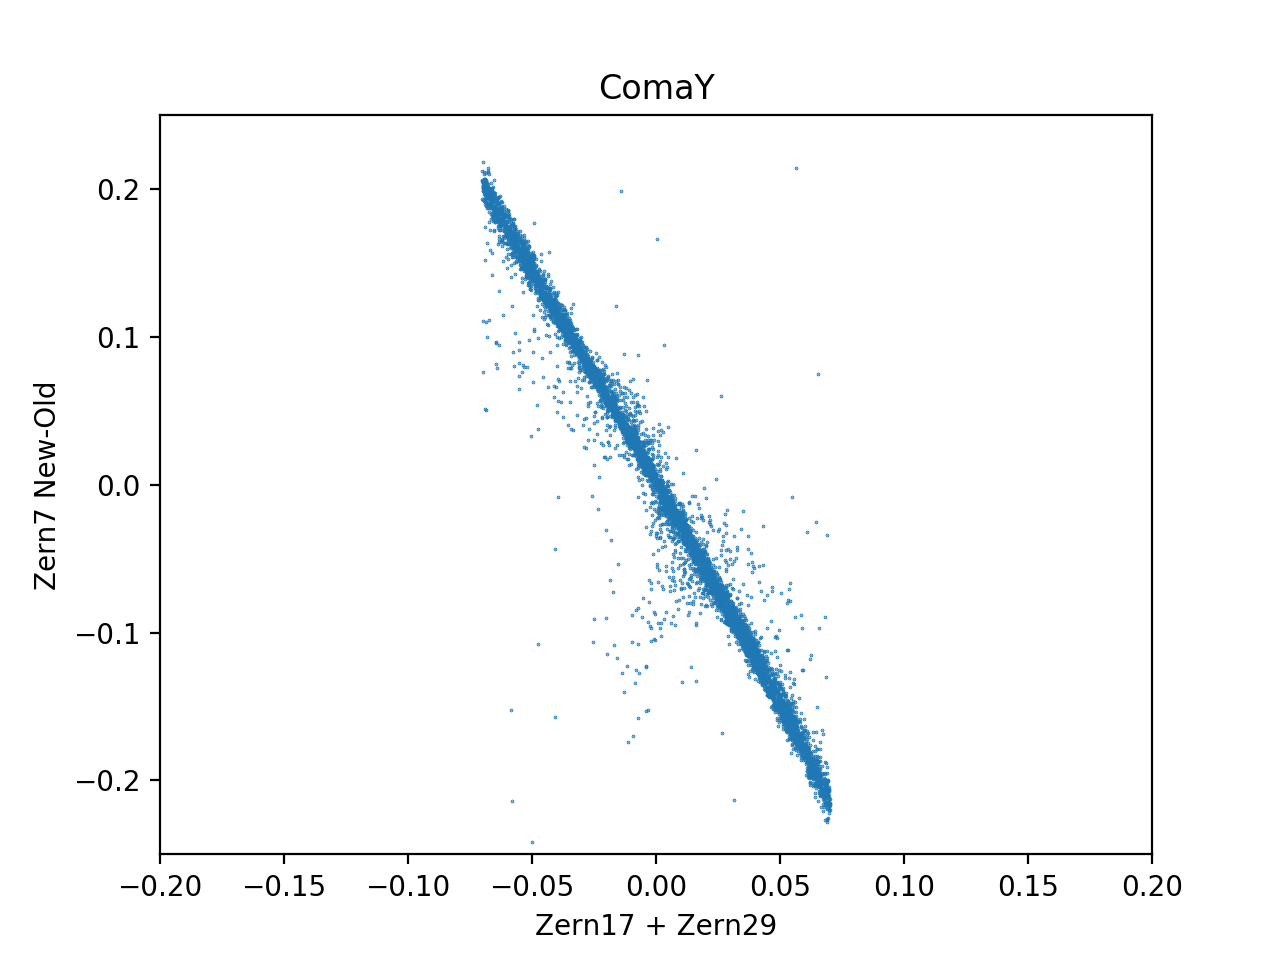

Text(0.5,1,'ComaY')

In [21]:
f,ax = plt.subplots(1,1)
ax.scatter(dfnew['ZERN17']+dfnew['ZERN29'],dfnew['ZERN7']-dfold['ZERN7'],s=0.1)
ax.set_xlim(-0.2,0.2)
ax.set_ylim(-.25,.25)
ax.set_ylabel("Zern7 New-Old")
ax.set_xlabel("Zern17 + Zern29")
ax.set_title("ComaY")

<IPython.core.display.Javascript object>


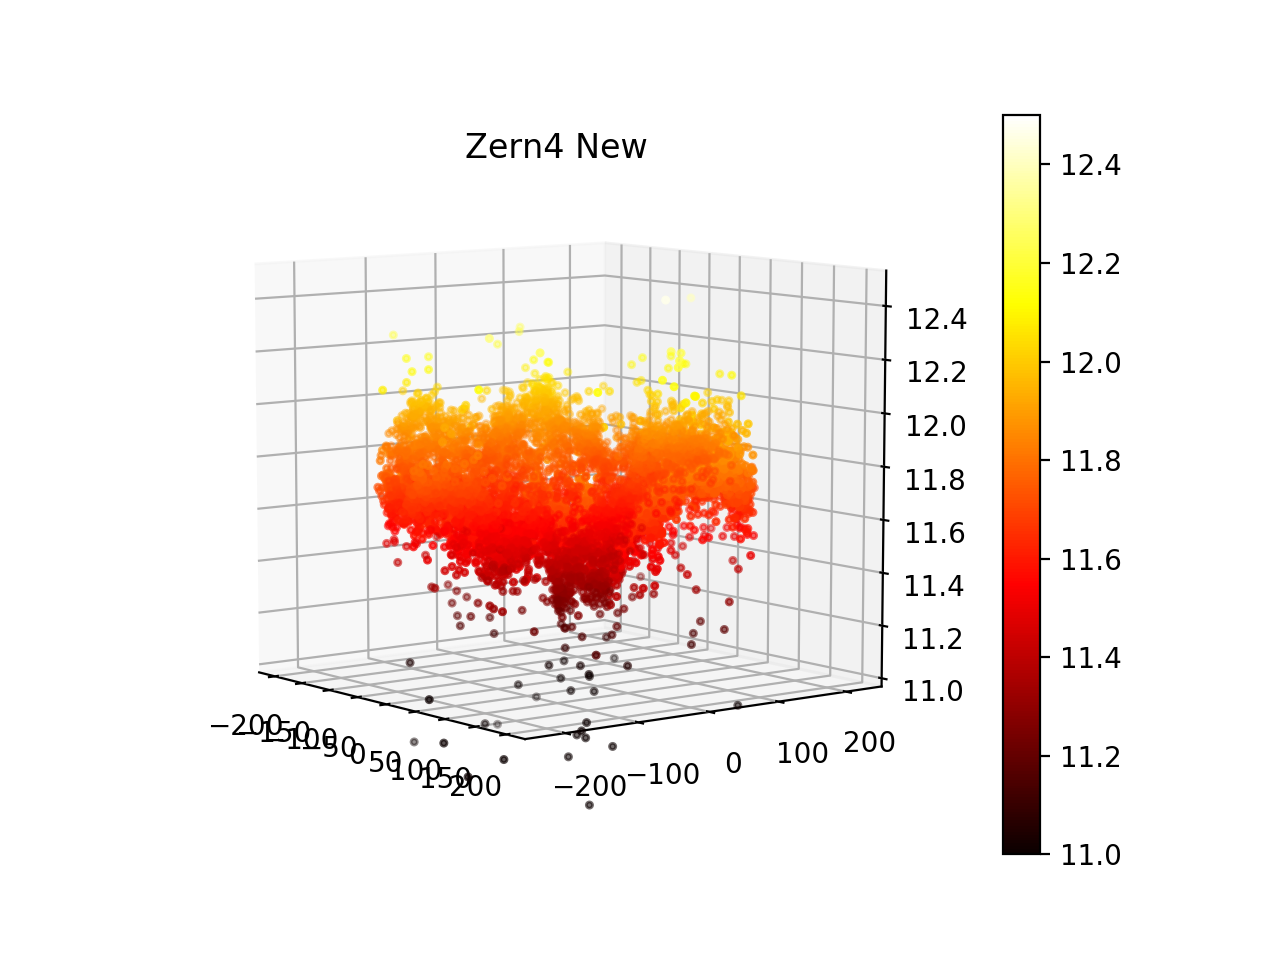

In [32]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
p = ax.scatter(dfnew_pass['XDECAM'], dfnew_pass['YDECAM'], dfnew_pass['ZERN4'], c=dfnew_pass['ZERN4'], vmin=11.0, vmax=12.5,marker='.',cmap='hot')
ax.set_zlim3d(11.0,12.5)
ax.set_title("Zern4 New")
fig.colorbar(p)

<IPython.core.display.Javascript object>


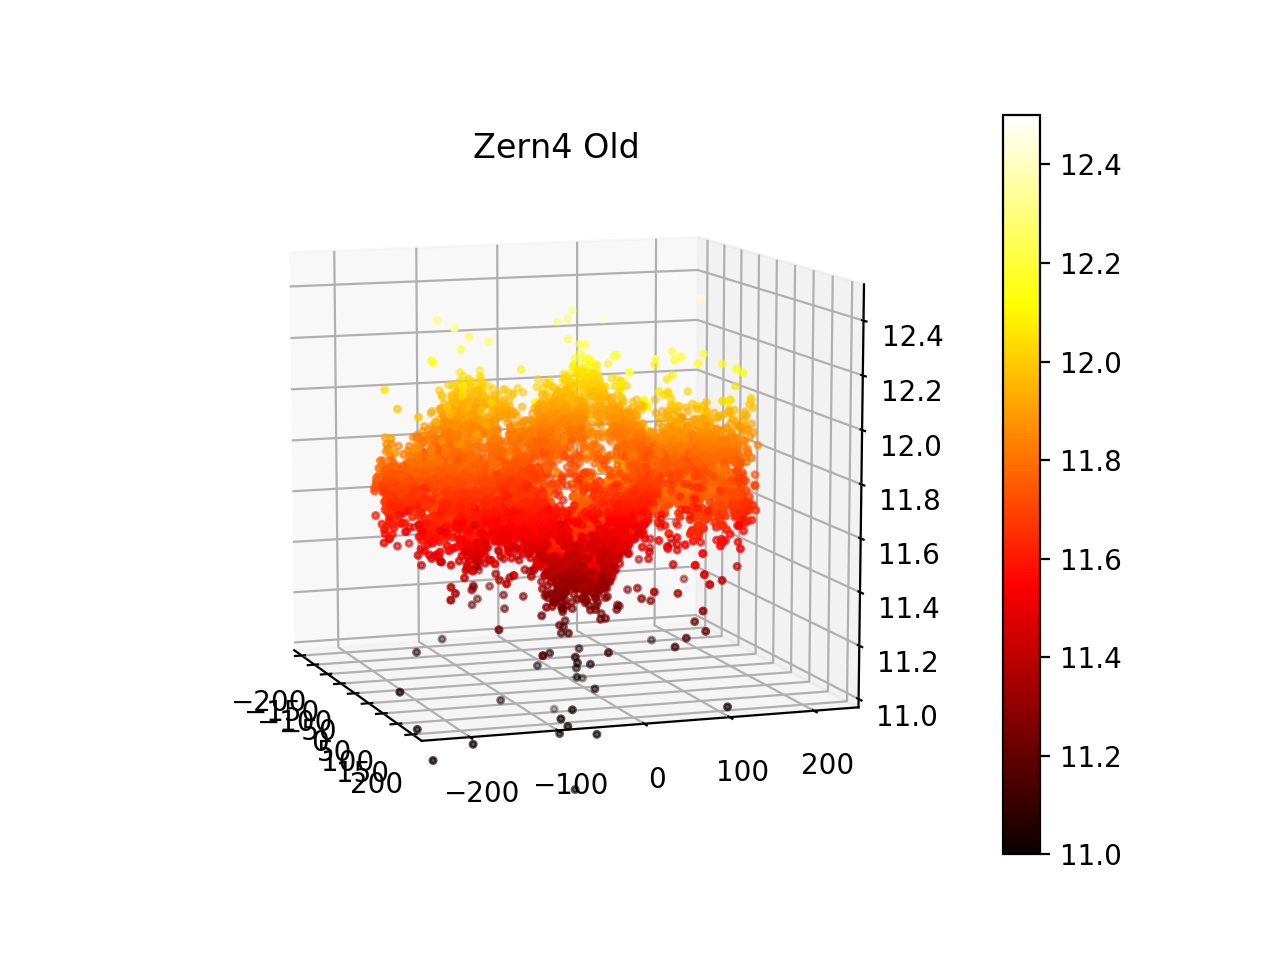

In [34]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
p = ax.scatter(dfold_pass['XDECAM'], dfold_pass['YDECAM'], dfold_pass['ZERN4'], c=dfold_pass['ZERN4'], vmin=11.0, vmax=12.5,marker='.',cmap='hot')
ax.set_zlim3d(11.0,12.5)
ax.set_title("Zern4 Old")
fig.colorbar(p)